In [36]:
import sys,os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.model_selection import train_test_split
from PIL import Image
from simple_convent import SimpleConvNet
from common.trainer import Trainer

In [37]:
def box_off():
    ax=plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

In [38]:
G1020_img=[]
G1020_label=[]
ORIGA_img=[]
ORIGA_label=[]
REFUGE_img=[]
REFUGE_label=[]

In [39]:
G1020_info=pd.read_csv('data/G1020/G1020.csv')
ORIGA_info=pd.read_csv('data/ORIGA/OrigaList.csv')

In [40]:
with open('data/REFUGE/index.json','r') as f:
    REFUGE_info = json.load(f)

In [41]:
for index in REFUGE_info:
    image_name=REFUGE_info[index]['ImgName']
    label=REFUGE_info[index]['Label']
    image=imread("data/REFUGE/Images/"+image_name)
    
    REFUGE_img.append(image)
    REFUGE_label.append(label)

In [42]:
for index in range(len(ORIGA_info)):
    image_name=ORIGA_info.Filename[index]
    label=ORIGA_info.Glaucoma[index]
    image=imread("data/ORIGA/Images_Square/"+image_name)
    
    ORIGA_img.append(image)
    ORIGA_label.append(label)

In [43]:
for index in range(len(G1020_info)):
    image_name=G1020_info.imageID[index]
    label=G1020_info.binaryLabels[index]
    image=imread("data/G1020/Images_Square/"+image_name)
    
    G1020_img.append(image)
    G1020_label.append(label)

In [44]:
print("G1020 dim:", G1020_img[0].shape)
print("ORIGA dim:", ORIGA_img[0].shape)
print("REFUGE dim:", REFUGE_img[0].shape)

G1020 dim: (512, 512, 3)
ORIGA dim: (512, 512, 3)
REFUGE dim: (1634, 1634, 3)


In [45]:

G1020_resized_img,G1020_labels = np.array(G1020_img),np.array(G1020_label)
ORIGA_resized_img,ORIGA_labels = np.array(ORIGA_img),np.array(ORIGA_label)

In [46]:
REFUGE_resized_img = []
for i in REFUGE_img:
    PIL_img = Image.fromarray(i)
    resized_img = PIL_img.resize((512, 512))
    REFUGE_resized_img.append(np.array(resized_img))
'''G1020_resized_img = []
for i in G1020_img:
    PIL_img = Image.fromarray(i)
    resized_img = PIL_img.resize((128, 128))
    G1020_resized_img.append(np.array(resized_img))
ORIGA_resized_img = []
for i in ORIGA_img:
    PIL_img = Image.fromarray(i)
    resized_img = PIL_img.resize((128, 128))
    ORIGA_resized_img.append(np.array(resized_img))'''
print("Resized REFUGE dim:", REFUGE_resized_img[0].shape)
print("Resized G1020 dim:", G1020_resized_img[0].shape)
print("Resized ORIGA dim:", ORIGA_resized_img[0].shape)

Resized REFUGE dim: (512, 512, 3)
Resized G1020 dim: (512, 512, 3)
Resized ORIGA dim: (512, 512, 3)


In [47]:
G1020_train_img, G1020_test_img, G1020_train_label, G1020_test_label = train_test_split(
    G1020_resized_img, G1020_labels, test_size=0.2, random_state=42)
ORIGA_train_img, ORIGA_test_img, ORIGA_train_label, ORIGA_test_label = train_test_split(
    ORIGA_resized_img, ORIGA_labels, test_size=0.2, random_state=42)
REFUGE_train_img, REFUGE_test_img, REFUGE_train_label, REFUGE_test_label = train_test_split(
    REFUGE_resized_img, REFUGE_label, test_size=0.2, random_state=42)

In [48]:
TRAIN_image = np.concatenate([G1020_train_img, ORIGA_train_img, REFUGE_train_img])
TRAIN_label = np.concatenate([G1020_train_label, ORIGA_train_label, REFUGE_train_label])
TEST_image = np.concatenate([G1020_test_img, ORIGA_test_img, REFUGE_test_img])
TEST_label = np.concatenate([G1020_test_label, ORIGA_test_label, REFUGE_test_label])

In [49]:
print("TRAIN_img.shape:", TRAIN_image.shape)
print("TRAIN_label.shape:", TRAIN_label.shape)
print("TEST_image.shape:", TEST_image.shape)
print("TEST_label.shape:", TEST_label.shape)


TRAIN_img.shape: (1656, 512, 512, 3)
TRAIN_label.shape: (1656,)
TEST_image.shape: (414, 512, 512, 3)
TEST_label.shape: (414,)


In [50]:
# 입력 데이터를 (샘플 수, 채널 수, 높이, 너비) 형태로 변환
TRAIN_img = TRAIN_image.transpose(0, 3, 1, 2)  # (1656, 3, 512, 512)
TEST_image = TEST_image.transpose(0, 3, 1, 2)  # (414, 3, 512, 512)


In [51]:
max_epochs=20

In [52]:
network = SimpleConvNet(input_dim=(3,512,512), 
                        conv_param = {'filter_num': 32, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=256, output_size=2, weight_init_std=0.01)

In [53]:
trainer = Trainer(network, TRAIN_image, TRAIN_label, TEST_image, TEST_label,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)

In [54]:
trainer.train()

331


ValueError: negative dimensions are not allowed

In [47]:
# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

Saved Network Parameters!


In [48]:
trainer.train_acc_list

[0.7198067632850241]

In [49]:
trainer.test_acc_list

[0.7053140096618358]

In [50]:
x

array([0, 1, 2, 3, 4])

ValueError: x and y must have same first dimension, but have shapes (20,) and (1,)

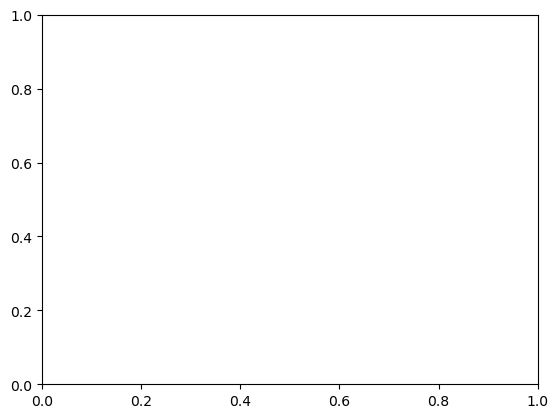

In [53]:
# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()